In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [47]:
# 修改日期格式
def date_format(dt):
    dt = str(dt)
    year = dt[:dt.find("年")]
    month = dt[dt.find("年")+1:dt.find("月")]
    day = dt[dt.find("月")+1:dt.find("日")]
    if len(month) == 1:
        month = '0' + month
    if len(day) == 1:
        day = '0' + day
    return year + '-' + month + '-' + day

In [48]:
df1 = pd.read_csv("../相关性系数/USD_CNY历史数据.csv")
df1['日期'] = df1['日期'].apply(date_format)
df1['月份'] = df1['日期'].apply(lambda x: x[:7])
df2 = pd.read_csv("../相关性系数/上证指数历史数据.csv")
df2['日期'] = df2['日期'].apply(date_format)
df2['月份'] = df2['日期'].apply(lambda x: x[:7])
df3 = pd.read_excel("../相关性系数/新冠疫情确诊数据.xlsx")
df3['月份'] = df3['日期'].apply(lambda x: str(x)[:7])
df4 = pd.read_excel("编码.xlsx")
df4['月份'] = df4['日期'].apply(lambda x: x[:7])
df4['公共事件X新冠疫情'] = df4['公共事件']*df4['新冠疫情']

In [41]:
pivot_table1 = pd.pivot_table(df1,index='月份',values='收盘',aggfunc='mean')
pivot_table2 = pd.pivot_table(df2,index='月份',values='收盘',aggfunc='mean')
pivot_table3 = pd.pivot_table(df3,index='月份',values='新增确诊',aggfunc='mean')
pivot_table4 = pd.pivot_table(df4,index = '月份',values=['公共事件','公共事件X新冠疫情'],aggfunc='mean')
pivot_table4['新冠公共事件占比'] = pivot_table4['公共事件X新冠疫情']/pivot_table4['公共事件']
pivot_table4['非新冠公共事件占比'] = 1 - pivot_table4['新冠公共事件占比']

In [42]:
df_total = pd.merge(left=pivot_table1,right=pivot_table2,left_index=True,right_index=True)
df_total = pd.merge(left=df_total,right=pivot_table3,left_index=True,right_index=True)
df_total = pd.merge(left=df_total,right=pivot_table4[['新冠公共事件占比','非新冠公共事件占比']],left_index=True,right_index=True)
df_total.columns = ['中美汇率','上证综指','新冠疫情','新冠公共事件占比','非新冠公共事件占比']
df_total.to_excel('时间序列图明细.xlsx')

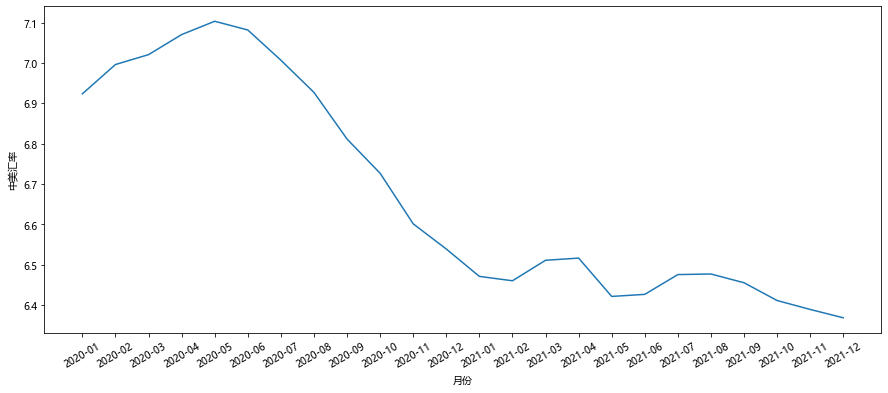

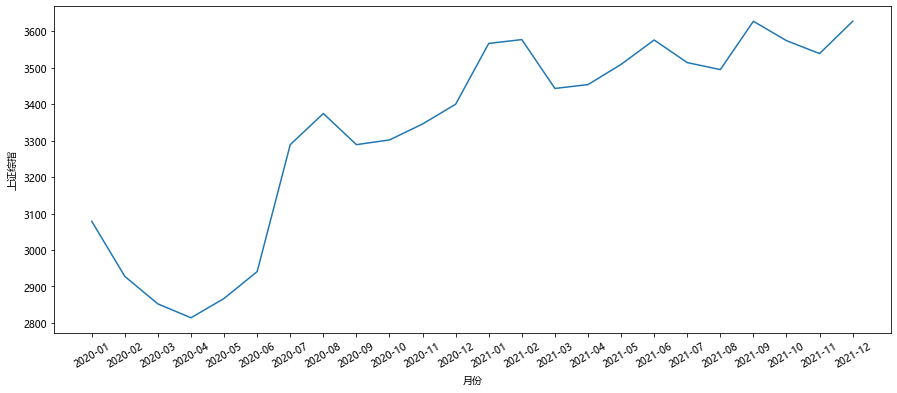

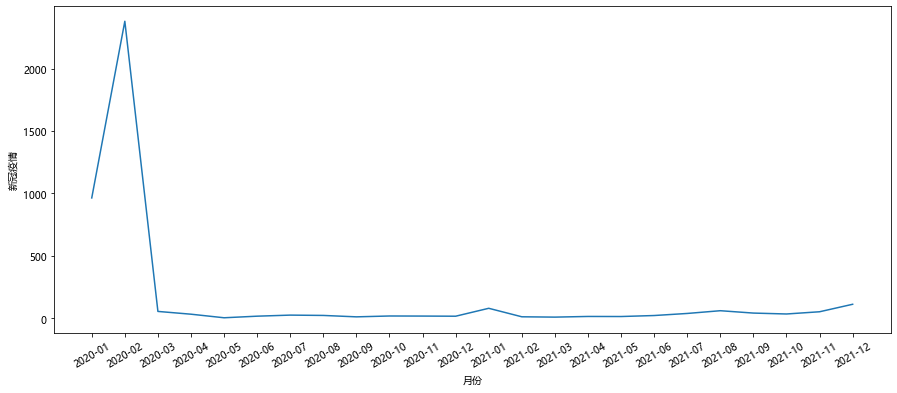

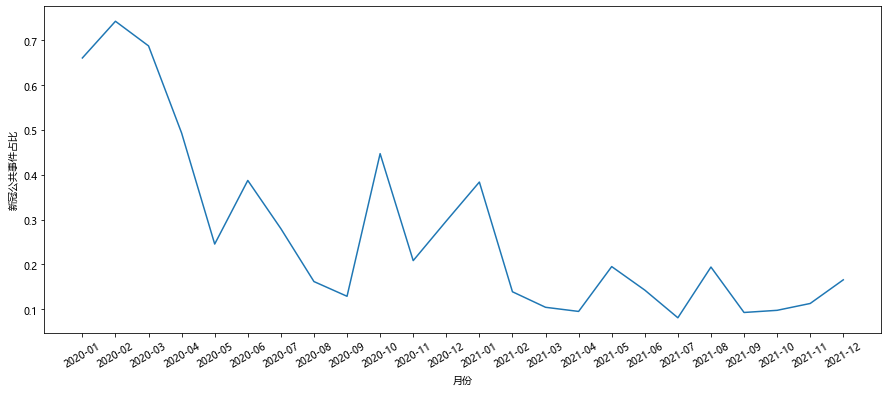

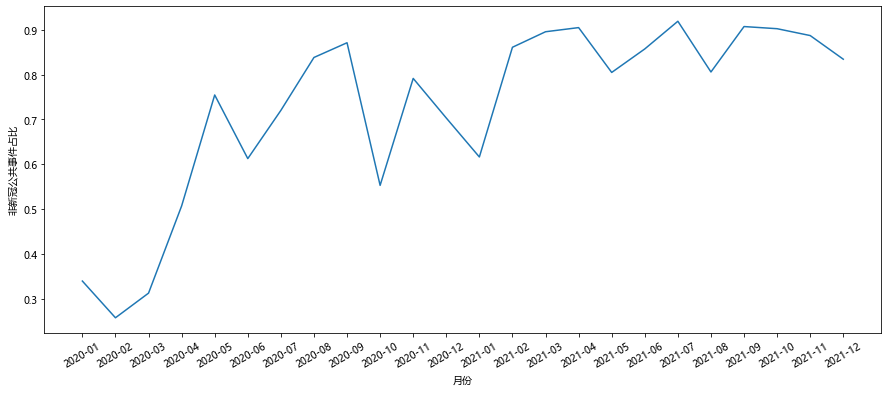

In [45]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签

for name in df_total.columns:
    plt.figure(figsize=(15,6))
    plt.xticks(rotation=30)
    sns.lineplot(x=df_total.index, y=df_total[name])
    plt.savefig("时间序列图-{}.png".format(name))

,公共事件,公共事件X新冠疫情,公共事件（除新冠）
月份,,,
2020-01,0.507289,0.335277,0.172012
2020-02,0.601719,0.446991,0.154728
2020-03,0.500000,0.343931,0.156069
2020-04,0.432277,0.213256,0.219020
2020-05,0.334311,0.082111,0.252199
2020-06,0.376093,0.145773,0.230321
2020-07,0.340136,0.095238,0.244898
2020-08,0.307918,0.049853,0.258065
2020-09,0.363636,0.046921,0.316716


# By Day

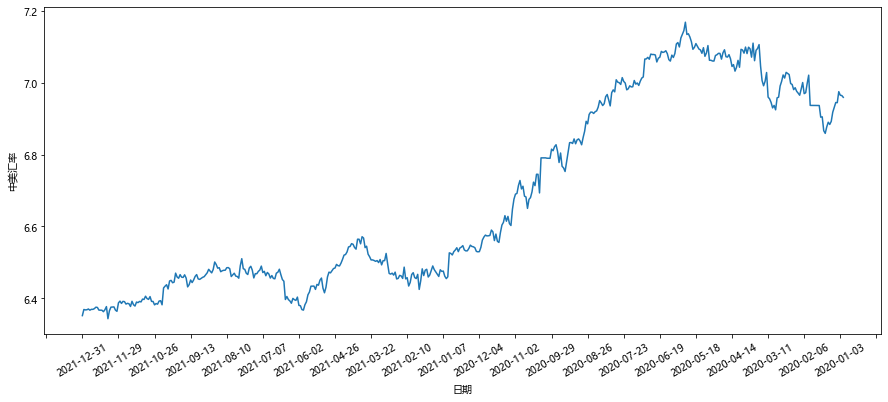

In [55]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 

plt.figure(figsize=(15,6))
plt.xticks(rotation=30)
sns.lineplot(x=df1['日期'], y=df1['收盘'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(24))
plt.ylabel("中美汇率")
plt.savefig("时间序列图-中美汇率-byday.png")

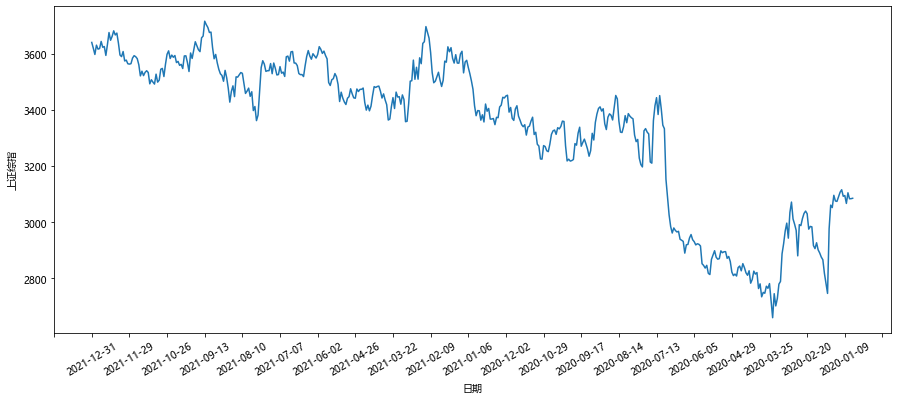

In [56]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 

plt.figure(figsize=(15,6))
plt.xticks(rotation=30)
sns.lineplot(x=df2['日期'], y=df2['收盘'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(24))
plt.ylabel("上证综指")
plt.savefig("时间序列图-上证综指-byday.png")